# Numeros Aleatorios o Pseudo-aleatorios

+ Son importantes para el analisis predictivo para analisis en modelos probabilisticos multicasos, donde el modelo tiene un rango posible y no es completamente determinista
+ Para rellenar datos vacios
+ Para seleccionar de datos tabulados los de entrenamiento y validacion de modelo

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generar 3 valores enteros aleatorios entre 1 y 10
np.random.randint(1,10,3)

array([4, 2, 7])

In [4]:
# Normalmente se emplea randoms entre 0 y 1
np.random.random()

0.10337715476517362

In [6]:
# Se pueden generar matrices entre 0 y 1
np.random.rand(2,3)

array([[0.66488756, 0.53572461, 0.85653479],
       [0.90911893, 0.83641685, 0.33568859]])

### Reordenamiento aleatorio o Shuffling

In [7]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
np.random.shuffle(a)
a

array([5, 9, 6, 2, 0, 1, 3, 8, 7, 4])

### Eleccion aleatoria

In [9]:
np.random.choice(a)

4

## Generacion de valores segun una distribucion

#### Distibucion Normal o de Gauss
+ Para grandes numeros se aplica a mas del 90% de los casos
+ Se describe segun su media y su desviacion estandar

In [10]:
normal_value = np.random.normal()
normal_value

-0.2272126508404264

<Axes: ylabel='Frequency'>

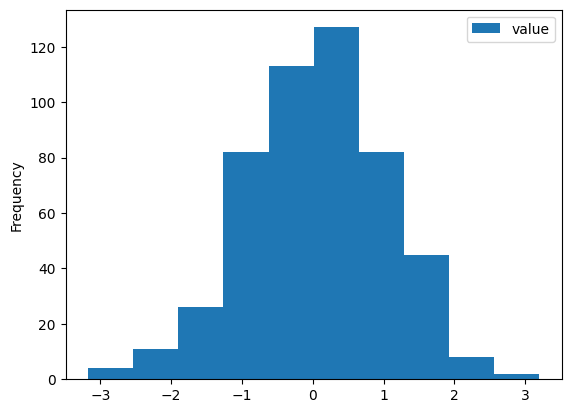

In [19]:
normal_values = np.random.normal(size=(500,1))
df_normal_values = pd.DataFrame(normal_values, columns=["value"])
df_normal_values.plot(kind="hist")

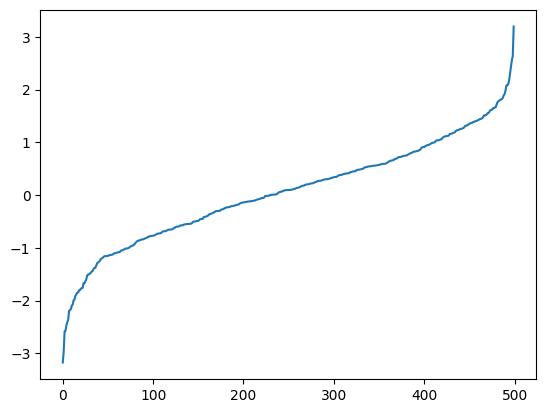

In [67]:
# Otra forma de visualizarlo es ver la funcion de dist acumulada
y=df_normal_values.sort_values(by="value", axis=0)
plt.plot(range(0,y.shape[0]), y["value"])

#### Distribucion Uniforme
+ Asumiendo un Area = 1 se tiene que la frecuencia de cada valor esta dada por f(x) = 1/(b-a), donde b es el valor maximo y a el minimo

In [11]:
uniform_value = np.random.uniform()
uniform_value

0.5389951873955947

<Axes: ylabel='Frequency'>

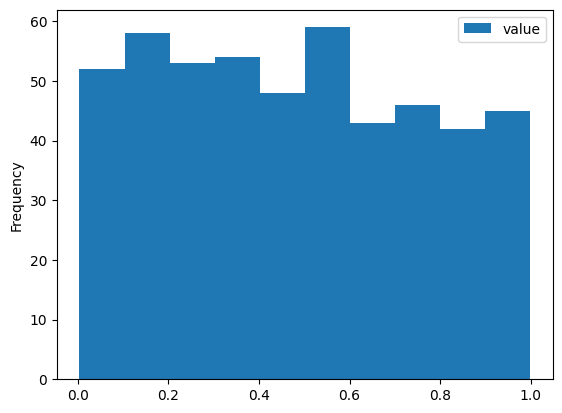

In [20]:
uniform_values = np.random.uniform(size=(500,1))
df_uniform_value = pd.DataFrame(uniform_values, columns=["value"])
df_uniform_value.plot(kind="hist")

<Axes: ylabel='Frequency'>

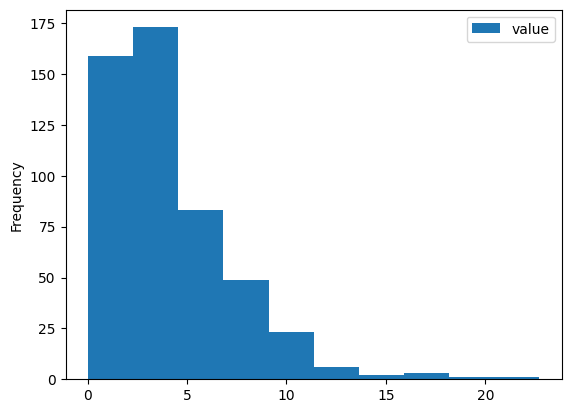

In [35]:
chisq_values = np.random.chisquare(normal_values+4)
df_chisq_values = pd.DataFrame(chisq_values, columns=["value"])
df_chisq_values.plot(kind="hist")

## Semillas
+ Para que los numeros pseudoaleatorios sean reproducibles, es decir sigan siempre la misma secuencia de generacion es posible fijar esto con una semilla

In [31]:
seed = 2018 # ejemplo semilla de curso
np.random.seed(seed)
for i in range(5):
    print(np.random.random())

0.8823493117539459
0.10432773786047767
0.9070093335163405
0.3063988986063515
0.446408872427422


In [32]:
# Si volvemos a generar numeros estos se deberian repetir
np.random.seed(seed)
for i in range(5):
    print(np.random.random())

0.8823493117539459
0.10432773786047767
0.9070093335163405
0.3063988986063515
0.446408872427422


## Simulacion de Montecarlo

1-Generacion 2 numeros aleatorios entre 0 y 1

2-Calculamos sqrt(x * x + y * y)

+ Si es inferior a 1  estamos en circulo

+ Si no estamos afuera

3-Calculamos el numero de veces que estan dentro del circulo y lo dividimos la cantidad de intentos

*Se debe repetir lo suficiente para obtener el valor de pi aproximado*

3.14156


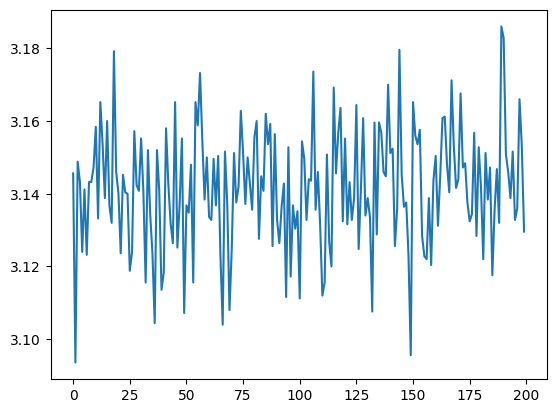

In [74]:
def pi_montecarlo(n:int=1000,n_sim:int=100):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_sim):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()

        for j in range(n):
            z = np.sqrt(x[j]**2 + y[j]**2)
            if z <= 1:
                value += 1

        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_sim
    fig = plt.plot(pi_value_list)

    return (pi,fig)

(pi,fig) = pi_montecarlo(10000, 200)
print(pi)
fig

## Dummy Datasets

In [77]:
n = 1000 # cantidad de datos
data = pd.DataFrame({
    "A" : np.random.randn(n),
    "B" : 1.5 + 2.5*np.random.randn(n),
    "C" : np.random.uniform(5,32, n)
})
data.head()

,A,B,C
0,0.944608,-1.923538,19.618111
1,-0.647199,7.997904,10.380425
2,-0.565258,1.687407,29.038325
3,-1.437186,-0.724733,7.357540
4,0.420822,3.329906,19.839583


In [79]:
data.describe()

,A,B,C
count,1000.000000,1000.000000,1000.000000
mean,-0.006183,1.539976,18.138655
std,1.002587,2.530405,8.118315
min,-3.305647,-6.248907,5.002568
25%,-0.674287,-0.145093,10.489472
50%,-0.010597,1.545042,18.109938
75%,0.633766,3.189924,25.432491
max,3.001392,8.510467,31.998571


<Axes: ylabel='Frequency'>

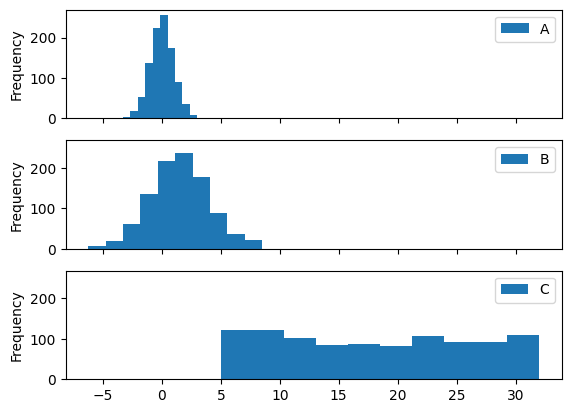

In [84]:
figure, axs = plt.subplots(3,1, sharex=True, sharey=True)
data.plot(kind="hist", y="A", ax=axs[0])
data.plot(kind="hist", y="B", ax=axs[1])
data.plot(kind="hist", y="C", ax=axs[2])